# Student ID: 18203485
# Name : Fergus Mc Hale

# E-tivity 3: Clustering and Manifold Learning

Use this notebook to complete Tasks 1 and 2 in E-tivity3.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import manifold
from sklearn import cluster
from sklearn import preprocessing

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from matplotlib.ticker import NullFormatter
import warnings
warnings.filterwarnings("ignore")

# Task 1 (CS5062)

Follow the examples in the notebook Lab 3 - Clustering and Manifold Learning.ipynb to cluster loans_dataset_et3.csv with the k-Means clustering algorithm and visualise the clustering. Use an appropriate feature-scaling technique and pick a value of k suggested by MDS and t-SNE visualisations of the dataset. Experiment with various values of the parameters of k-Means. Aim at producing a meaningful clustering that allows you to describe the clusters with words. Write a short conclusion about the characteristics of the clusters (max 250 words).

In [2]:
etv3_df = pd.read_csv("./loans_dataset_et3.csv")

In [3]:
numerical_cat = etv3_df._get_numeric_data().columns

In [4]:
len(numerical_cat)

5

In [5]:
def display_field_info(category_type):
    if(len(category_type) > 0):
        for key in category_type:
            print("\n______\t",key,"\t_________")
            print("Total Values = \t",etv3_df[key].count(),"\n")
            print(etv3_df[key].value_counts())
            print("_________________________________________")

In [6]:
display_field_info(numerical_cat)


______	 ApplicantIncome 	_________
Total Values = 	 332 

2500     6
6250     4
8333     4
6000     3
3500     3
2583     2
14583    2
3466     2
2333     2
2600     2
3750     2
3173     2
2666     2
9323     2
3333     2
3000     2
5417     2
3859     2
4166     2
4583     2
5703     2
3159     2
2479     2
4000     2
3083     2
5000     2
5800     1
14880    1
4750     1
3246     1
        ..
1875     1
2900     1
4950     1
3927     1
3417     1
17500    1
5468     1
2400     1
5285     1
2917     1
4009     1
2920     1
3406     1
3917     1
3667     1
3400     1
4188     1
5955     1
2882     1
2083     1
3902     1
3900     1
4923     1
10750    1
8072     1
4408     1
3073     1
4917     1
3316     1
3691     1
Name: ApplicantIncome, Length: 296, dtype: int64
_________________________________________

______	 CoapplicantIncome 	_________
Total Values = 	 332 

0.0        141
5625.0       3
2500.0       3
1666.0       3
2531.0       2
2250.0       2
1459.0       2
2054.0       

In [7]:
etv3_df.head(5)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,2483,2466.0,90,180,0
1,4917,0.0,130,360,0
2,4106,0.0,40,180,1
3,3859,3300.0,142,180,1
4,6417,0.0,157,180,1


In [8]:
etv3_df.tail(5)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
327,5417,4196.0,267,360,1
328,16666,0.0,275,360,1
329,10750,0.0,312,360,1
330,5955,5625.0,315,360,1
331,6133,3906.0,324,360,1


In [9]:
etv3_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,332.000000,332.000000,332.000000,332.000000,332.000000
mean,5201.093373,1495.508795,140.882530,341.710843,0.978916
std,4584.815491,1982.742932,75.544237,61.651497,0.143882
min,645.000000,0.000000,17.000000,60.000000,0.000000
25%,2912.750000,0.000000,100.000000,360.000000,1.000000
50%,3858.500000,1211.500000,128.000000,360.000000,1.000000
75%,5818.250000,2250.000000,162.000000,360.000000,1.000000
max,39999.000000,20000.000000,600.000000,480.000000,1.000000


In [10]:
etv3_df = np.array(etv3_df.values, dtype=float)
print('(number of examples, number of attributes): ', etv3_df.shape)

(number of examples, number of attributes):  (332, 5)


In [11]:
min_max_scaler = preprocessing.MinMaxScaler()
etv3_data = min_max_scaler.fit_transform(etv3_df)

In [12]:
colors = np.array(['orange', 'blue', 'lime', 'blue', 'khaki', 'pink', 'green', 'purple'])

In [13]:
def clustering_scatterplot(points, labels, centers, title):
    # plot the examples, i.e. the data points
    
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

In [14]:
k = 7

In [15]:
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(etv3_df)

In [16]:
etv3_data_and_centers = np.r_[etv3_df,clustered_data_sklearn.cluster_centers_]

In [17]:
XYcoordinates = manifold.MDS(n_components=2).fit_transform(etv3_data_and_centers)
print("transformation complete")

transformation complete


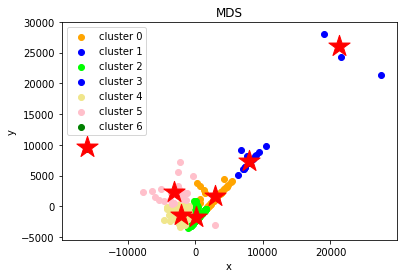

In [18]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS')

In [19]:
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(etv3_data_and_centers)
print("transformation complete")

transformation complete


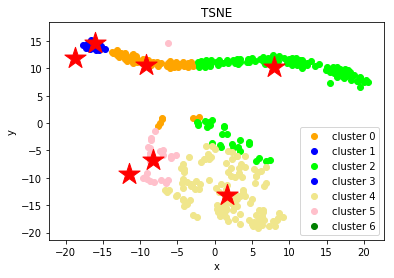

In [20]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-k:,:], 
                       title='TSNE')

In [22]:
etv3_df['cluster'] = pd.Series(clustered_data_sklearn.labels_, index=etv3_df.index)

AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [ ]:
etv3_df.groupby('cluster').mean()

# Task 2 (CS5062)

* Plot the sum of squared distances from the data points (in loans_dataset_et3.csv) to the centers of the k-Means clusters for various values of k. 
* Use the Elbow method to pick the best value of k. Attempt also another method for determining the best value of k. If these methods suggest a different value of k (from the one you used in Task 1), then compute a new k-Means clustering.
* Use another clustering algorithm (from the ones available in scikit-learn) for the same dataset and an appropriate manifold-learning technique to visualise it.
* Discuss the differences between the k-Means clustering and the clustering found by the second algorithm you have tried in words (max 250 words) and by visualising the clusterings with an appropriate manifold-learning technique.

In [ ]:
def SSE(data,max_range):
    sse = {}
    for k in range(1, max_range):
        clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=1000).fit(data)
        lab3_df["clusters"] = clustered_data_sklearn.labels_
        sse[k] = clustered_data_sklearn.inertia_
    plt.figure()
    plt.plot(list(sse.keys()), list(sse.values()))
    plt.xlabel("Number of cluster")
    plt.ylabel("SSE")
    plt.show()

In [ ]:
for i in range(1,10):
    SSE(lab3_df,i)

In [ ]:
cluster_range = range(2,10)

for n_clusters in cluster_range:

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(lab3_data) + (n_clusters + 1) * 10])
    
    clusterer = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(lab3_data)
    cluster_labels = clusterer.fit_predict(lab3_data)

    silhouette_avg = silhouette_score(lab3_data, cluster_labels)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(lab3_data, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
          sample_silhouette_values[cluster_labels == i]
        
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        
        y_upper = y_lower + size_cluster_i
        
        color = plt.cm.Spectral(float(i) / n_clusters)
        
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)

          # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

          # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhoutte score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = plt.cm.Spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(lab3_data[:, 0], lab3_data[:, 1], marker='.', s=30, lw=0, alpha=0.7,
              c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
              marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
          ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                "with n_clusters = %d" % n_clusters),
               fontsize=14, fontweight='bold')

    plt.show()

In [ ]:
n_components = 100
for n in range(1,10):
    plt.figure()
    Y = manifold.Isomap(n, n_components).fit_transform(lab3_data)
    ax = fig.add_subplot(257)
    plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
    plt.title("Isomap")
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.axis('tight')
    plt.show()

In [ ]:
n_neighbors = 100
for n in range(2,10):
    plt.figure()
    se = manifold.SpectralEmbedding(n_components=n,n_neighbors=n_neighbors)
    Y = se.fit_transform(lab3_data)
    ax = fig.add_subplot(259)
    plt.clf()
    plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
    plt.title("SpectralEmbedding")
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.axis('tight')
    plt.show()

* [1] [Maniflold Learning PyData] (https://www.youtube.com/watch?v=j8080l9Pvic)
* [2] [Euclidean Distance] (https://stackoverflow.com/questions/1401712/how-can-the-euclidean-distance-be-calculated-with-numpy)
* [3] [Manifold Learning Scikitlearn] (https://scikit-learn.org/stable/modules/manifold.html)
* [4] [Manifold Learning Github] (https://github.com/cc-skuehn/Manifold_Learning/)
* [5] [Cluster Validation] (http://www.awesomestats.in/python-cluster-validation/)
* [6] [Silhouette Analysis] (https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py)
* [7] [Elbow method] (https://pythonprogramminglanguage.com/kmeans-elbow-method/)